<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/AdaBoost/36_AdaboostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/16-diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


In [10]:
df['BloodPressure'].value_counts()

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
columns_to_check = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in columns_to_check:
  total_zero = (df[col] == 0).sum()
  print(total_zero)

print("----------------------------")

for col in columns_to_check:
  total_zero = (df[col] == 0).sum()
  zero_percentage = (100*total_zero)/len(df)
  print(f"{col} : {total_zero} %{zero_percentage:.2f}")

5
35
227
374
11
----------------------------
Glucose : 5 %0.65
BloodPressure : 35 %4.56
SkinThickness : 227 %29.56
Insulin : 374 %48.70
BMI : 11 %1.43


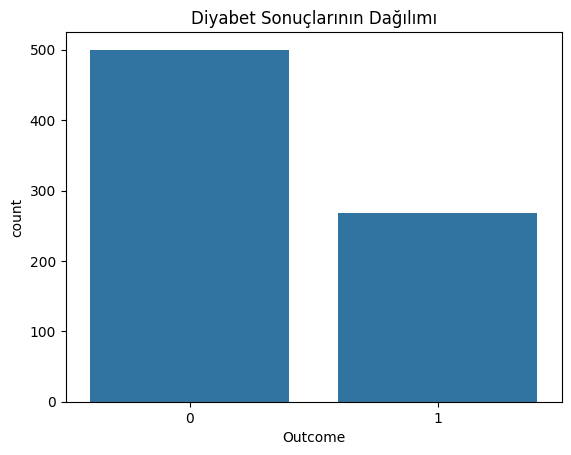

In [16]:
# Diyabet durumunun sayısını görselleştirelim
sns.countplot(x='Outcome', data=df)
plt.title('Diyabet Sonuçlarının Dağılımı')
plt.show()

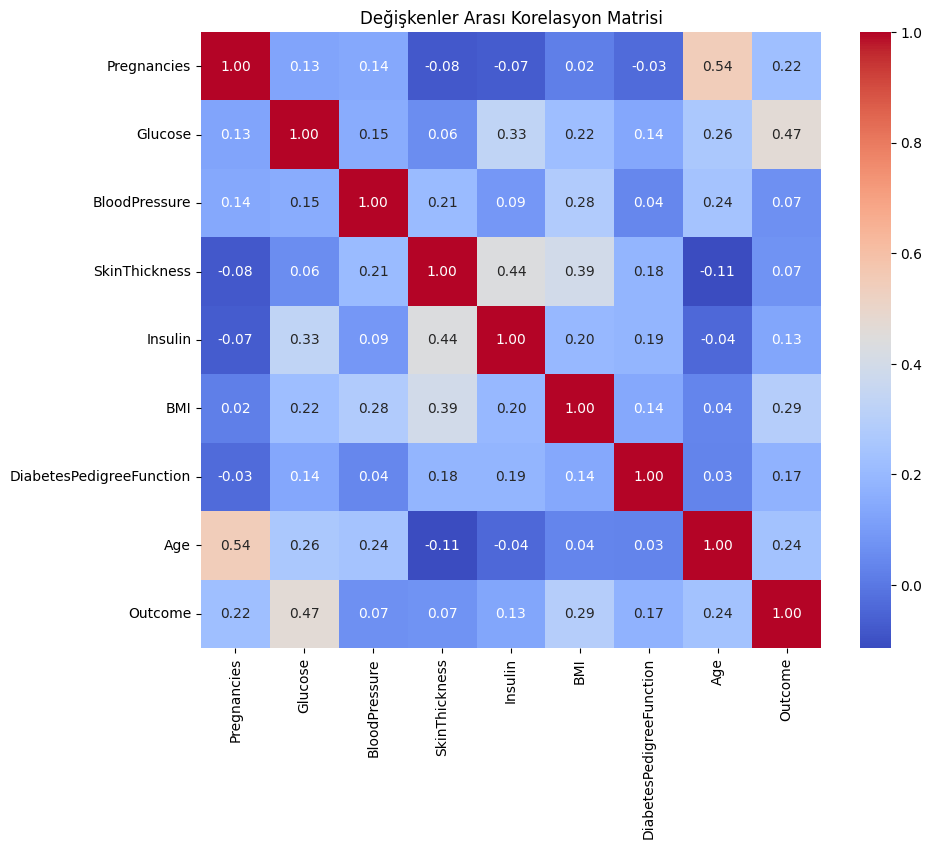

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

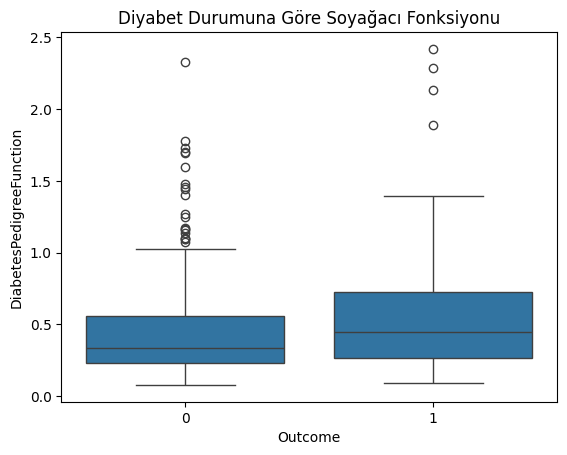

In [18]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Diyabet Durumuna Göre Soyağacı Fonksiyonu')
plt.show()

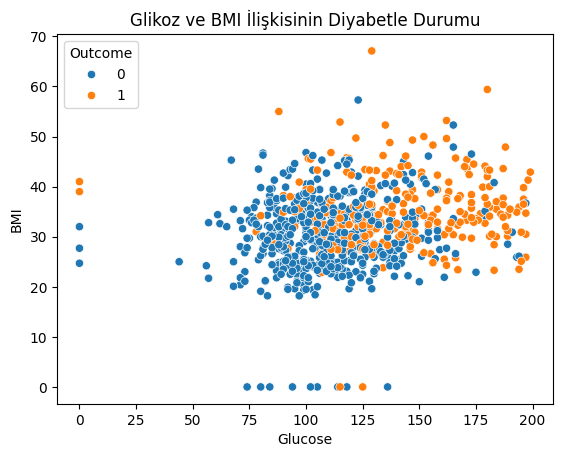

In [19]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df)
plt.title('Glikoz ve BMI İlişkisinin Diyabetle Durumu')
plt.show()

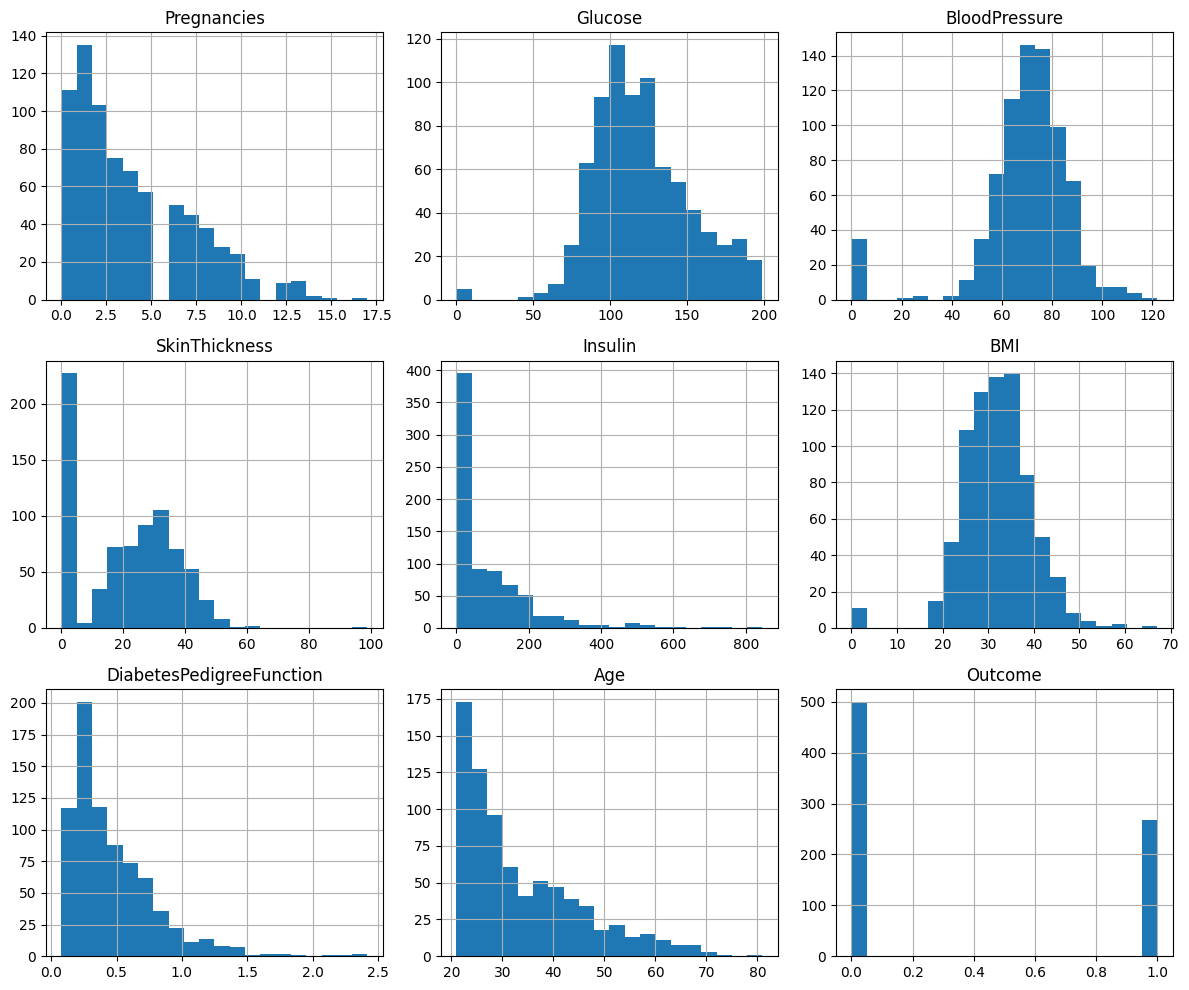

In [20]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1899655417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df,


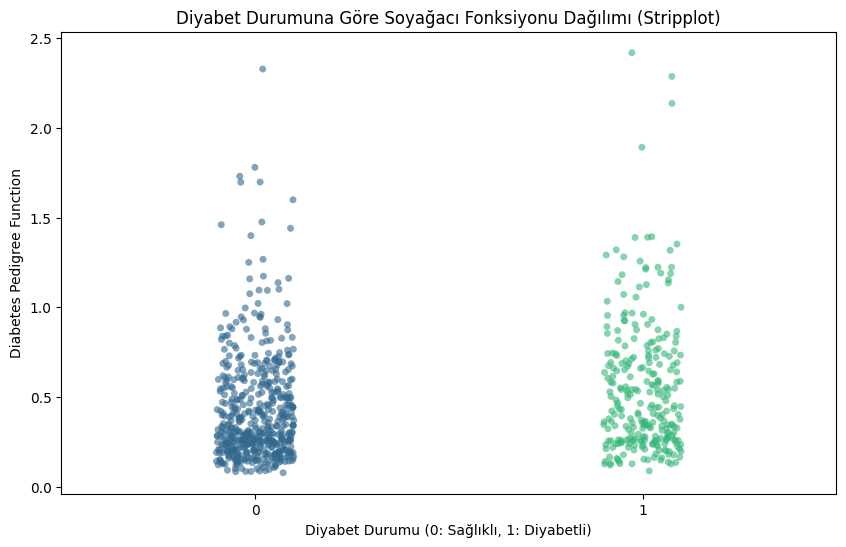

In [22]:
plt.figure(figsize=(10, 6))

sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df,
              jitter=True, palette='viridis', alpha=0.6)

plt.title('Diyabet Durumuna Göre Soyağacı Fonksiyonu Dağılımı (Stripplot)')
plt.xlabel('Diyabet Durumu (0: Sağlıklı, 1: Diyabetli)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

In [23]:
# dependent-independent features

In [24]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [27]:
columns_to_fill = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [32]:
medians = {}
for col in columns_to_fill:
   median_value = X_train[X_train[col] != 0][col].median()
   medians[col] = median_value
   X_train[col] = X_train[col].replace(0,median_value)


for col in columns_to_fill:
  X_test[col] = X_test[col].replace(0,medians[col])

In [33]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [34]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

[[87 21]
 [17 29]]


In [40]:
# hyperparameter-tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
adaboost_params = {
    "n_estimators" : [50,70,100,120,150,200],
    "learning_rate" : [0.001,0.01,0.1,1,10]
}

In [43]:
grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid = adaboost_params, cv=3, verbose=1 , n_jobs=-1)

In [44]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [45]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [46]:
ada = AdaBoostClassifier(learning_rate = 1,n_estimators=200)

In [47]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       108
           1       0.57      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154

[[86 22]
 [17 29]]
